# World Happiness Index Data Analysis

## Author : Bhupender Singh

## MKR Task - 4 (Visualization Part)

### 📌 Problem Statement : -
### To Clean, Analyze and Visualize(Using Plotly Dash) The World Happiness Index Dataset From The Year(2015-2020)


### Let's Start With Importing The Necessary Modules For Data Visualization Using Plotly Dash

In [1]:
import pandas as pd
import numpy as np
import dash
import dash_table
import dash_core_components as dcc
import dash_bootstrap_components as dbc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import plotly.express as px

#For Calculations
import statistics
import math

#Libraries For Generating Word Cloud:-
from os import path, getcwd
from PIL import Image
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt

### Importing The Final Merged Dataset That We Already Created By Merging All The Individual Datasets(After Cleaning Them)

In [2]:
df = pd.read_csv('Happiness_Data.csv')

In [3]:
df.columns

Index(['Country', 'Year', 'Region', 'Rank', 'Score', 'GDP Per Capita',
       'Social Support', 'Health Life Expectancy',
       'Freedom To Make Life Choices', 'Corruption Perceptions', 'Generosity'],
      dtype='object')

# ----->KPI DATA :

### (1/5). Average Number Of Countries Listed In Happiness Report From Year(2015-2020)

In [4]:
df_15 = df[df.Year==2015]
total_country_15 = len(df_15['Country'].unique())
df_16 = df[df.Year==2016]
total_country_16 = len(df_16['Country'].unique())
df_17 = df[df.Year==2017]
total_country_17 = len(df_17['Country'].unique())
df_18 = df[df.Year==2018]
total_country_18 = len(df_18['Country'].unique())
df_19 = df[df.Year==2019]
total_country_19 = len(df_19['Country'].unique())
df_20 = df[df.Year==2020]
total_country_20 = len(df_20['Country'].unique())
print(f'Total countries in 2015 Dataset {total_country_15}')
print(f'Total countries in 2016 Dataset {total_country_16}')
print(f'Total countries in 2017 Dataset {total_country_17}')
print(f'Total countries in 2018 Dataset {total_country_18}')
print(f'Total countries in 2019 Dataset {total_country_19}')
print(f'Total countries in 2020 Dataset {total_country_20}')
x = [total_country_15,total_country_16,total_country_17,total_country_18,total_country_19,total_country_20]
avg_country_no = statistics.mean(x)
avg_country_no_rounded_off = math.ceil(avg_country_no)
print(f"Average Number of countries from year 2015-2020 in happiness datasets {avg_country_no_rounded_off}")

Total countries in 2015 Dataset 158
Total countries in 2016 Dataset 157
Total countries in 2017 Dataset 155
Total countries in 2018 Dataset 156
Total countries in 2019 Dataset 156
Total countries in 2020 Dataset 153
Average Number of countries from year 2015-2020 in happiness datasets 156


### (2/5). Happiest Country From Year(2015-2020)

***Taking The Mean Value To Get The Most Happiest Country From Year(2015-2020)***

In [5]:
happiest = df.groupby('Country')['Score'].mean().sort_values(ascending = False)[:10]
happiest

Country
Finland        7.582950
Denmark        7.562600
Norway         7.532167
Switzerland    7.519483
Iceland        7.509917
Netherlands    7.411983
Canada         7.330850
Sweden         7.324917
New Zealand    7.310767
Australia      7.267300
Name: Score, dtype: float64

### (3/5). Saddest Country From Year(2015-2020)

***Taking The Mean Value To Get The Most Saddest From Year(2015-2020)***

In [6]:
saddest = df.groupby('Country')['Score'].mean().sort_values(ascending = True)[:10]
saddest

Country
Burundi                     3.195050
Central African Republic    3.202580
South Sudan                 3.269320
Syria                       3.292200
Afghanistan                 3.355150
Rwanda                      3.417550
Tanzania                    3.467700
Yemen                       3.609400
Togo                        3.651367
Botswana                    3.771483
Name: Score, dtype: float64

### (4/5). Most Generous Country From Year(2015-2020)

***Taking The Mean Value To Get The Top Generous Country From Year(2015-2020)***

In [7]:
generous = df.groupby('Country')['Generosity'].mean().sort_values(ascending = False)[:10]
generous

Country
Myanmar              0.697913
Indonesia            0.536152
Somaliland Region    0.514790
Somaliland region    0.503180
Thailand             0.472515
Malta                0.457800
Haiti                0.450927
Bhutan               0.434699
Syria                0.431285
United Kingdom       0.416148
Name: Generosity, dtype: float64

### (5/5). Country Where Citizens Received Most Social Support From Year(2015-2020)

***Taking The Mean Value To Get The Top Country Where Citizens Received Most Social Support From Year(2015-2020)***

In [8]:
social_support = df.groupby('Country')['Social Support'].mean().sort_values(ascending = False)[:10]
social_support

Country
Iceland              1.501939
Trinidad & Tobago    1.484500
Denmark              1.456982
Ireland              1.449313
New Zealand          1.447644
Finland              1.445279
Norway               1.441758
Uzbekistan           1.434087
Switzerland          1.426511
Australia            1.420363
Name: Social Support, dtype: float64

In [9]:
health = df.groupby('Country')['Health Life Expectancy'].mean().sort_values(ascending = False)[:10]
health

Country
Hong Kong S.A.R. of China    1.039847
Singapore                    1.034791
Hong Kong                    1.029513
Japan                        0.994730
Northern Cyprus              0.975500
Spain                        0.966981
South Korea                  0.960931
Switzerland                  0.947021
Italy                        0.944355
France                       0.935153
Name: Health Life Expectancy, dtype: float64

# ----->Word Cloud

### 1. For Happy Countries

In [10]:
wordcloud_happy = df.groupby('Country')['Score'].mean().sort_values(ascending = False)
wordcloud_happy

Country
Finland                     7.582950
Denmark                     7.562600
Norway                      7.532167
Switzerland                 7.519483
Iceland                     7.509917
                              ...   
Afghanistan                 3.355150
Syria                       3.292200
South Sudan                 3.269320
Central African Republic    3.202580
Burundi                     3.195050
Name: Score, Length: 171, dtype: float64

***Creating a Dictionary Using Above Data For Wordcloud of Top Happiest Countries(We Are Using The Happiness Score As The Frequency To Generate The Wordcloud***

In [11]:
happy_freq = dict(wordcloud_happy)
happy_freq

{'Finland': 7.5829499912784835,
 'Denmark': 7.562599946328004,
 'Norway': 7.532166682548461,
 'Switzerland': 7.519483294173056,
 'Iceland': 7.509916683153361,
 'Netherlands': 7.41198334634025,
 'Canada': 7.330849999123534,
 'Sweden': 7.324916634815227,
 'New Zealand': 7.310766708949952,
 'Australia': 7.26729994964856,
 'Austria': 7.167366664326945,
 'Israel': 7.139933323618204,
 'Costa Rica': 7.12539997919755,
 'Puerto Rico': 7.039,
 'United States': 6.988933336919597,
 'Luxembourg': 6.98625001784611,
 'Ireland': 6.985950028085205,
 'Germany': 6.953466692603842,
 'United Kingdom': 6.952416743677856,
 'Belgium': 6.911749985334391,
 'Oman': 6.853,
 'United Arab Emirates': 6.751966643081462,
 'Czech Republic': 6.697316720332275,
 'Mexico': 6.681833370277425,
 'Brazil': 6.610766681646973,
 'Malta': 6.573799986568157,
 'France': 6.539966612543661,
 'Chile': 6.529249973234823,
 'Singapore': 6.515183336283813,
 'Panama': 6.499133362523966,
 'Taiwan Province of China': 6.438699960667725,
 'Uru

***Masking Is Used To Masked The Wordcloud On The Desired Image(In This Case It Is Happy Emoji That Can Be Used To Show The Happy Countries***
<br>
***Generating and Saving The Wordcloud(Happy Countries)***

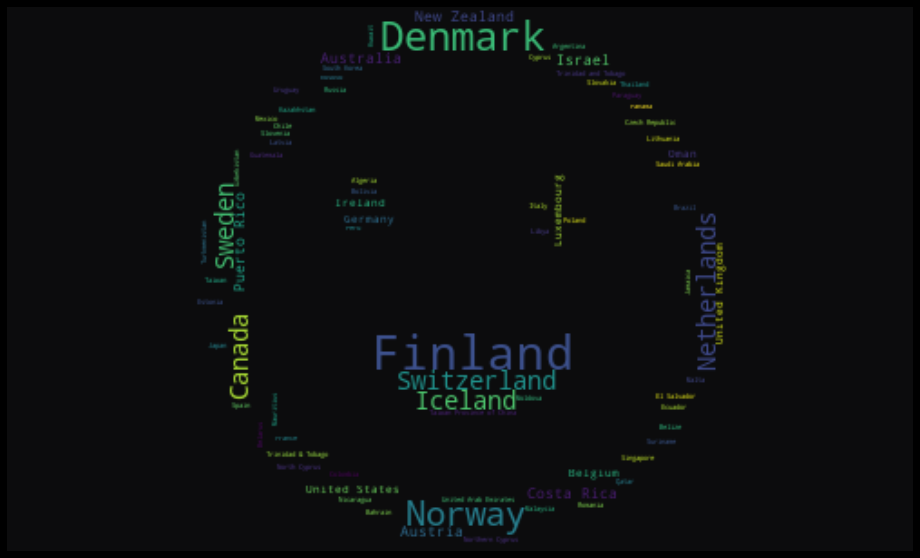

In [12]:
c = getcwd()
mask = np.array(Image.open(path.join(c, "happy.png")))
wordcloud_happy = WordCloud(background_color="#0c0c0d",mask=mask,
               max_font_size=90, random_state=42)
wordcloud_happy.generate_from_frequencies(frequencies=happy_freq)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud_happy, interpolation="bilinear")
plt.axis("off")
plt.savefig('happy_countries.png', facecolor='k', bbox_inches='tight')

### 2. For Sad Countries

In [13]:
wordcloud_sad = df.groupby('Country')[['Country','Score']].mean().sort_values(by='Score',ascending = True)
wordcloud_sad

,Score
Country,
Burundi,3.195050
Central African Republic,3.202580
South Sudan,3.269320
Syria,3.292200
Afghanistan,3.355150
...,...
Iceland,7.509917
Switzerland,7.519483
Norway,7.532167


***Now For Wordcloud Of Sad Countries First We Need To Create The Dataframe As Above And Then Reset The Index Because To Generate The Wordcloud For Sad Countries We Need To Reverse The Freuqency(Happiness Score) Of Happy Countries To Get The Frequency That We Need To Generate The Wordcloud For Sad Countries***

In [14]:
wordcloud_sad.reset_index(inplace=True)
wordcloud_sad['Score'] = wordcloud_sad['Score'].values[::-1]
wordcloud_sad

,Country,Score
0,Burundi,7.582950
1,Central African Republic,7.562600
2,South Sudan,7.532167
3,Syria,7.519483
4,Afghanistan,7.509917
...,...,...
166,Iceland,3.355150
167,Switzerland,3.292200
168,Norway,3.269320
169,Denmark,3.202580


***Now We Can Follow The Same Steps As We Did For Generating The Wordcloud Of Happy Countries***
<br>
***So Now We Can Create The Dictionary For Sad Countries Wordcloud***

In [15]:
sad_freq = dict(zip(wordcloud_sad.Country, wordcloud_sad.Score))
sad_freq

{'Burundi': 7.5829499912784835,
 'Central African Republic': 7.562599946328004,
 'South Sudan': 7.532166682548461,
 'Syria': 7.519483294173056,
 'Afghanistan': 7.509916683153361,
 'Rwanda': 7.41198334634025,
 'Tanzania': 7.330849999123534,
 'Yemen': 7.324916634815227,
 'Togo': 7.310766708949952,
 'Botswana': 7.26729994964856,
 'Madagascar': 7.167366664326945,
 'Malawi': 7.139933323618204,
 'Haiti': 7.12539997919755,
 'Angola': 7.039,
 'Zimbabwe': 6.988933336919597,
 'Liberia': 6.98625001784611,
 'Lesotho': 6.985950028085205,
 'Guinea': 6.953466692603842,
 'Comoros': 6.952416743677856,
 'Chad': 6.911749985334391,
 'Uganda': 6.853,
 'Benin': 6.751966643081462,
 'India': 6.697316720332275,
 'Burkina Faso': 6.681833370277425,
 'Niger': 6.610766681646973,
 'Sudan': 6.573799986568157,
 'Mali': 6.539966612543661,
 'Cambodia': 6.529249973234823,
 'Egypt': 6.515183336283813,
 'Congo (Kinshasa)': 6.499133362523966,
 'Ukraine': 6.438699960667725,
 'Mauritania': 6.432683364864217,
 'Djibouti': 6.4

***Masking Is Used To Masked The Wordcloud On The Desired Image(In This Case It Is Sad Emoji That Can Be Used To Show The Sad Countries***
<br>
***Generating and Saving The Wordcloud(Sad Countries)***

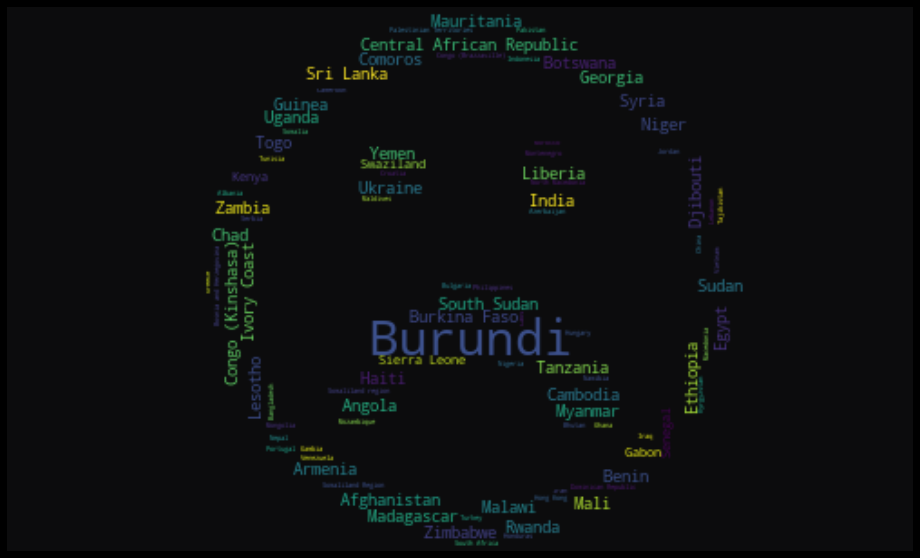

In [16]:
c = getcwd()
mask = np.array(Image.open(path.join(c, "sad.png")))
wordcloud_sad = WordCloud(background_color="#0c0c0d",mask=mask,
               max_font_size=90, random_state=42)
wordcloud_sad.generate_from_frequencies(frequencies=sad_freq)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud_sad, interpolation="bilinear")
plt.axis("off")
plt.savefig('sad_countries.png', facecolor='k', bbox_inches='tight')

### Rounding Off The Values For Dash Table To 3 Decimal Places

In [17]:
df[['Score','GDP Per Capita', 'Social Support', 'Health Life Expectancy','Freedom To Make Life Choices','Corruption Perceptions', 'Generosity']] = \
df[['Score','GDP Per Capita', 'Social Support', 'Health Life Expectancy','Freedom To Make Life Choices','Corruption Perceptions'
    , 'Generosity']].round(decimals=3)

# ----->Stack Bar Chart

***Taking The Mean Values To Get The Top Countries From Year(2015-2020)***

***Created A New Dataframe 'stack' For Creating Stack Bar With The Required Columns To Compare Top 20 Happiest Countries***

In [18]:
stack = df.groupby('Country')['Score','GDP Per Capita','Social Support', 'Health Life Expectancy',
       'Freedom To Make Life Choices', 'Corruption Perceptions', 'Generosity'].mean().sort_values(by='Score',ascending = False)[:20]
stack.reset_index(inplace=True)
stack

<ipython-input-18-99d7bc8af769>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Score,GDP Per Capita,Social Support,Health Life Expectancy,Freedom To Make Life Choices,Corruption Perceptions,Generosity
0,Finland,7.583000,1.345000,1.445333,0.888333,0.628333,0.411833,0.208167
1,Denmark,7.562667,1.385000,1.457000,0.884333,0.632333,0.440500,0.306167
2,Norway,7.532167,1.503333,1.441833,0.895833,0.643333,0.359000,0.322167
3,Switzerland,7.519500,1.458667,1.426500,0.947000,0.622167,0.384500,0.276167
4,Iceland,7.509833,1.376667,1.502000,0.931667,0.625333,0.141000,0.409667
5,Netherlands,7.412000,1.399000,1.368667,0.894833,0.593667,0.310333,0.401833
6,Canada,7.330833,1.373667,1.395333,0.921167,0.616500,0.313500,0.371667
7,Sweden,7.324833,1.390333,1.379333,0.913500,0.623000,0.404833,0.326000
8,New Zealand,7.310833,1.305000,1.447667,0.911000,0.622500,0.410167,0.415000
9,Australia,7.267333,1.380667,1.420333,0.932667,0.607833,0.318000,0.401000


# Dashboard

In [ ]:
app = dash.Dash(__name__, meta_tags=[{"name": "viewport", "content": "width=device-width"}])

#------------------------------------------------------------------------------------------------------------------------------------------------------------
#Year Filter Options For GDP & Social Support Scatter Plot
year_options = []
for year in df['Year'].unique():
    year_options.append({'label':str(year),'value':year})
    
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------    
#Dropdown Options For Happiness Rank & Score Plot
region = [{'label': i, 'value': i} for i in df['Region'].unique()]
opt_data = [{'label': 'Happiness Score', 'value':'Score'},
                {'label': 'Happiness Rank', 'value': 'Rank'}]


#------------------------------------------------------------------------------------------------------------------------------------
#Stacked Bar Chart
trace1 = go.Bar(
    x=stack['Country'],
    y=stack['Social Support'],
    name='Social Support',
    marker=dict(color='#470447') 
)
trace2 = go.Bar(
    x=stack['Country'],
    y=stack['GDP Per Capita'],
    name='GDP Per Capita',
    marker=dict(color='#8c068c') 
)
trace3 = go.Bar(
    x=stack['Country'], 
    y=stack['Health Life Expectancy'],
    name = 'Health Life Expectancy',
    marker=dict(color='#d408d4') 
)
trace4 = go.Bar(
    x=stack['Country'],
    y=stack['Freedom To Make Life Choices'],
    name='Freedom To Make Life Choices',
    marker=dict(color='#d145d1')
)
trace5 = go.Bar(
    x=stack['Country'],
    y=stack['Generosity'],
    name='Generosity',
    marker=dict(color='#d6a5d6')
)
trace6 = go.Bar(
    x=stack['Country'],
    y=stack['Corruption Perceptions'],
    name='Corruption Perceptions',
    marker=dict(color='#D8BFD8') 
)

    
data = [trace1, trace2, trace3,trace4, trace5, trace6]
layout = go.Layout(
    barmode='stack',
    plot_bgcolor='#0c0c0d',
    paper_bgcolor='#0c0c0d'
)

stack_bar = go.Figure(data=data, layout=layout)
stack_bar.update_layout(title_x=0.5)
stack_bar.update_layout(height=500)
stack_bar.update_xaxes(showgrid=False, zeroline=False, color='rgb(192,192,192)')
stack_bar.update_yaxes(showgrid=False, zeroline=False, showticklabels=False)

#-------------------------------------------------------------------------------------------------------------------------------------
#Headers
app.layout = html.Div([
    html.Div([
        html.Span([
            html.Img(src=app.get_asset_url('mkr.png'),
                     id='mkr-image',
                     style={
                         "height": "50%",
                         "width": "50%",
                         "margin-bottom": "0px",
                         "border":"2px grey solid",
                     },
                     )
        ],
            className="one-third column",
        ),
        
     html.Div([
            html.Div([
                html.Span('World Happiness Index Data Analysis', style={"margin-bottom": "1px", 'color': 'black',
                                                                                'fontFamily': 'fantasy','fontSize': 38,
                                                                "border":"2px grey solid","background-color":"#D8BFD8"}),
                html.Br(),
                html.Span('Year(2015-2020)', style={"margin-top": "0px", 'color': 'black','fontFamily': 'fantasy','fontSize':20,
                                               "border":"2px grey solid","background-color":"#D8BFD8"}),
            ])
        ], className="five column", id="title"),
    
        
        html.Div([
            html.Span('Data Viz By : Bhupender Singh',
                    style={'color': 'black','fontSize': 19,
                           'fontFamily': 'fantasy',"background-color":"#D8BFD8"}),

        ], className="create_container three columns", id='title1'),

    ], id="header", className="row flex-display", style={"margin-bottom": "25px"}),

#-------------------------------------------------------------------------------------------------------------------------------
#KPI
#1/5 KPI 
html.Div([
        html.Div([
            html.H6(children='Countries Listed In Report',
                    style={
                        'textAlign': 'center',
                        'color': 'black'}
                    ),html.Img(src=app.get_asset_url('globe.png'),style={
                         "height": "25%",
                         "width": "35%",
                         "margin-bottom": "0px",
                         "display": "block",
                         "margin-left": "auto",
                         "margin-right": "auto",
                     }),

            html.P(f"{avg_country_no_rounded_off}" + '/195',
                   style={
                       'textAlign': 'center',
                       'color': 'black',
                       'fontSize': 40}
                   ),

            html.P('Average No. of Countries(Each Year)',
                   style={
                       'textAlign': 'center',
                       'color': 'black',
                       'fontSize': 15,
                       'margin-top': '-18px'}
                   )], className="card_container three columns",
        ),
#2/5 KPI
 html.Div([   
            html.H6(children='Happiest Country',
                    style={
                        'textAlign': 'center',
                        'color': 'black'}
                    ),html.Img(src=app.get_asset_url('finland.png'),style={
                         "height":"25%",
                         "width": "35%",
                         "margin-bottom": "0px",
                         "display": "block",
                         "margin-left": "auto",
                         "margin-right": "auto",
                     }),
           html.P(f"{happiest.index[0]}",
                               style={
                                   'textAlign': 'center',
                                   'color': 'black',
                                   'fontSize': 40}
                  ),
            
              html.P('Average Happiness Score:  ' + f"{round(happiest[0],3)}",
                  
                   style={
                       'textAlign': 'center',
                       'color': 'black',
                       'fontSize': 15,
                       'margin-top': '-18px'}
                   )], className="card_container three columns",
        ),
#3/5 KPI  
html.Div([
            html.H6(children='Saddest Country',
                    style={
                        'textAlign': 'center',
                        'color': 'black'}
                    ),html.Img(src=app.get_asset_url('burundi.png'),style={
                         "height": "25%",
                         "width": "35%",
                         "margin-bottom": "0px",
                         "display": "block",
                         "margin-left": "auto",
                         "margin-right": "auto",
                     }),

            html.P(f"{saddest.index[0]}",
                   style={
                       'textAlign': 'center',
                       'color': 'black',
                       'fontSize': 40}
                   ),

            html.P('Average Happiness Score:  ' + f"{round(saddest[0],3)}",
                   style={
                       'textAlign': 'center',
                       'color': 'black',
                       'fontSize': 15,
                       'margin-top': '-18px'}
                   )], className="card_container three columns",
        ),
#4/5 KPI
html.Div([
            html.H6(children='Most Generous Country',
                    style={
                        'textAlign': 'center',
                        'color': 'black'}
                    ),html.Img(src=app.get_asset_url('myanmar.png'),style={
                         "height": "25%",
                         "width": "35%",
                         "margin-bottom": "0px",
                         "display": "block",
                         "margin-left": "auto",
                         "margin-right": "auto",
                     }),

            html.P(f"{generous.index[0]}",
                   style={
                       'textAlign': 'center',
                       'color': 'black',
                       'fontSize': 40}
                   ),

            html.P('Average Score:  ' + f"{round(generous[0],3)}",
                   style={
                       'textAlign': 'center',
                       'color': 'black',
                       'fontSize': 15,
                       'margin-top': '-18px'}
                   )], className="card_container three columns",
        ),
#5/5 KPI
html.Div([
            html.H6(children='Social Support Received',
                    style={
                        'textAlign': 'center',
                        'color': 'black'}
                    ),html.Img(src=app.get_asset_url('iceland.png'),style={
                         "height": "25%",
                         "width": "35%",
                         "margin-bottom": "0px",
                         "display": "block",
                         "margin-left": "auto",
                         "margin-right": "auto",
                     }),

            html.P(f"{social_support.index[0]}",
                   style={
                       'textAlign': 'center',
                       'color': 'black',
                       'fontSize': 40}
                   ),

            html.P('Average Score:  ' + f"{round(social_support[0],3)}",
                   style={
                       'textAlign': 'center',
                       'color': 'black',
                       'fontSize': 15,
                       'margin-top': '-18px'}
                   )], className="card_container three columns")

    ], className="row flex-display"),

#------------------------------------------------------------------------------------------------------------------------------------
#Dropdown For choropleth Map  
    html.Div([
        html.Div([
                    html.P('Countries Listed In World Happiness Index Report', className='fix_label',  
                           style={'color': 'black','fontFamily': 'fantasy'}),

                       dcc.Dropdown(id="pick_year",placeholder='Select Year',
                                  options=[{'label': year, 'value': year}
                                           for year in (df['Year'].unique())],
                 multi=False,
                 value=2015,
                 style={'backgroundColor': '#0c0c0d', 'color': 'black','width': "100%"}
               ),
            html.Div(id='map', children=[]),
    html.Br(),

    dcc.Graph(id='happiness_world_map', figure={})


        ], className="create_container eight columns"),
        
#----------------------------------------------------------------------------------------------------------------------------------
#Dash Table
html.Div([
html.Div([dash_table.DataTable(
        id='dashtable',
        columns=[
            {"name": i, "id": i, "deletable": True, "selectable": True, "hideable": True}
            if i == "Region" or  i=='GDP Per Capita' or i== 'Social Support'or i== 'Health Life Expectancy'or i == 'Freedom To Make Life Choices' or i== 'Corruption Perceptions' or i== 'Generosity' or i == "id" 
            else {"name": i, "id": i, "deletable": False, "selectable": True}
            for i in df.columns
        ],
        data=df.to_dict('records'), filter_action="native", sort_action="native", sort_mode="single",        
        row_deletable=False, selected_columns=[],  selected_rows=[], page_action="native",page_current=0,
        page_size=16,                
       style_cell={    
            'backgroundColor': '#0c0c0d','color': 'white','minWidth': 85, 'maxWidth': 85, 'width': 85,
            'textAlign': 'left'
        },
        style_cell_conditional=[  
            {
                'if': {'column_id': i},
                'textAlign': 'left'
            } for i in ['Country','Rank']
        ],
    ),
    html.Div(id='table'),
    
    
    ],className="create_container twelve columns"),
    
], className="row flex-display"),
        
#---------------------------------------------------------------------------------------------------------------------------------------------------------
#Word Clouds
html.Div([
        html.Span([
            html.Span('Happy Countries', className='fix_label',  
                           style={'color': 'black','fontFamily': 'fantasy'}),
            html.Img(src=app.get_asset_url('happy_countries.png'),
                    id='wordcloud_happy_image',
                     style={
                         "height": "100%",
                         "width": "100%",
                         "margin-bottom": "0px",
                         "border":"2px grey solid",
                     },
                     )
        ],
            className="create_container six columns",
        ),
            html.Span([
                html.Span('Sad Countries', className='fix_label',  
                               style={'color': 'black','fontFamily': 'fantasy'}),
                html.Img(src=app.get_asset_url('sad_countries.png'),
                         id='wordcloud_sad_image',
                         style={
                             "height": "100%",
                             "width": "100%",
                             "margin-bottom": "0px",
                             "border":"2px grey solid",
                     },
                     )
        ],
            className="create_container six columns",
        ),

    ],className="row flex-display", style={"margin-bottom": "40px"}),
                   
#----------------------------------------------------------------------------------------------------------------------------------------
#Placing The Stack Bar
html.Div([
        html.Div([
            html.Span('Contribution Of Different Parameters In The Ranking Of Top 20 Happiest Countries', 
                      style={"margin-bottom": "1px", 'color': 'black','fontFamily': 'fantasy','fontSize': 20,
                             'textAlign': 'center',"border":"2px #D8BFD8","background-color":"#D8BFD8"}),
            html.Div(dcc.Graph(figure=stack_bar))
        ],
            className="create_container twelve columns",
        ),

    ],className="row flex-display", style={"margin-bottom": "0px"}),
        
#------------------------------------------------------------------------------------------------------------------------------------------    
#Placing GDP & Social Support Vs Happiness Score Scatter Plot
html.Div([
    html.Span('Comparison Of Happiness Score With GDP & Social Support Parameter', 
                      style={"margin-bottom": "1px", 'color': 'black','fontFamily': 'fantasy','fontSize': 20,
                             'textAlign': 'center',"border":"2px #D8BFD8","background-color":"#D8BFD8"}),  
    html.P('Pick Year To Compare:', className='fix_label', 
                      style={'color': 'black','font-style': 'italic','fontSize': 15}),
    dcc.Dropdown(id='pick_year2',options=year_options,value=df['Year'].min(), style={'backgroundColor': '#0c0c0d', 'color': 'black','width': "100%"}),
    dcc.Graph(id='graph'),
    dcc.Graph(id='graph2'),
              ],className="create_container twelve columns"),
#-------------------------------------------------------------------------------------------------------------------------------------     
#Placing Happiness Rank & Score Plot     
    html.Div([
    html.Span('Happiness Rank & Score', 
                      style={"margin-bottom": "1px", 'color': 'black','fontFamily': 'fantasy','fontSize': 30,
                             'textAlign': 'center',"border":"2px #D8BFD8","background-color":"#D8BFD8"}),    
    html.Div([ html.P('Select Region,Desired Country and The Parameter(Score or Rank):', className='fix_label', 
                      style={'color': 'black','font-style': 'italic','fontSize': 15}),

    dcc.Dropdown(id='regdrp',
                   options=region,
                   value='Sub-Saharan Africa',
                   style={'backgroundColor': '#0c0c0d', 'color': 'black','width': "100%"}),
    dcc.Dropdown(id='country_drp',
                 options=[],
                 value='',
                 style={'backgroundColor': '#0c0c0d', 'color': 'black','width': "100%"}),
    dcc.Dropdown(id='datdrp',
                   options=opt_data,
                   value='Score',
                   style={'backgroundColor': '#0c0c0d', 'color': 'black','width': "100%"}),
    dcc.Graph(id='rank_score'),
    html.Div(id='pick')]),


        ], className="create_container twelve columns"),
        
  
    ])
])


#-----------------------------------------------------------------------------------------------------------------------------------------
#callbacks
#choropleth map
@app.callback(
    [Output(component_id='map', component_property='children'),
     Output(component_id='happiness_world_map', component_property='figure')],
    [Input(component_id='pick_year', component_property='value')]
)
def update_graph(selection):
    description = 'Pick Year & Hover Over Any Country From World Map To Get The Information'
    df_map = df[df["Year"] == selection]
    fig = go.Figure(data=go.Choropleth(
    locations=df_map['Country'],
    text = df_map[['Year','Region']],
    z = df_map['Score'].astype(float),
    locationmode = 'country names',
    colorscale = [[0, 'rgb(216,191,216)'],[1, 'rgb(71,4,71)']]))
    
    fig.update_layout(height=500,margin={"r":0,"t":0,"l":0,"b":0},geo=dict(bgcolor= '#0c0c0d', lakecolor='#4E5D6C', landcolor='#0c0c0d',
                                          subunitcolor='#D8BFD8'),title_text="Country's Rank",
                                          paper_bgcolor='#0c0c0d')
    return description, fig
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
#Dash table
@app.callback(
    Output(component_id='table', component_property='children'),
    [Input(component_id='dashtable', component_property="derived_virtual_data"),
     Input(component_id='dashtable', component_property='derived_virtual_selected_rows'),
     Input(component_id='dashtable', component_property='derived_virtual_selected_row_ids'),
     Input(component_id='dashtable', component_property='selected_rows'),
     Input(component_id='dashtable', component_property='derived_virtual_indices'),
     Input(component_id='dashtable', component_property='derived_virtual_row_ids'),
     Input(component_id='dashtable', component_property='active_cell'),
     Input(component_id='dashtable', component_property='selected_cells')]
)
#-------------------------------------------------------------------------------------------------------------------------------------------
#Country Dropdown
@app.callback(
    Output('country_drp', 'options'),
    Output('country_drp', 'value'),
    Input('regdrp', 'value'))
        

def update_dropdown(region_sel):
    dff = df[df['Region'] == region_sel]
    options = [{'label': i, 'value': i} for i in
                       dff['Country'].unique()]
    return options, options[0]['value']
#------------------------------------------------------------------------------------------------------------------------------------------------
#Happiness Rank & Score
@app.callback(
    Output('rank_score', 'figure'),
    Output('pick', 'children'),
    Input('country_drp', 'value'),
    Input('datdrp', 'value'))
def update_graph(pick_con, pick_data):
    dff = df[df['Country'] == pick_con]
    lineplot = px.line(dff,x="Year", y=pick_data,title=f'Happiness {pick_data} of {pick_con}',template = "plotly_dark")
    lineplot.update_traces(mode='markers+lines',line=dict(color='#D8BFD8',width=3),marker=dict(color='#8c068c',size=12))
    lineplot.update_xaxes(showgrid=False, zeroline=False,color='rgb(192,192,192)')
    lineplot.update_yaxes(showgrid=False, zeroline=False,color='rgb(192,192,192)',showticklabels=False)
    
    avg_val = dff[pick_data].mean()
    return lineplot, f'The average {pick_data} for {pick_con} is {avg_val}'
#----------------------------------------------------------------------------------------------------------------------------------------------
#GDP & Social Support Scatterplot
#GDP
@app.callback(Output('graph', 'figure'),
              [Input('pick_year2', 'value')])
def update_graph(select):
    dff = df[df['Year'] == select]
    traces = []
    for region in dff['Region'].unique():
        region_df = dff[dff['Region'] == region]
        traces.append(go.Scatter(
            x=region_df['GDP Per Capita'],
            y=region_df['Score'],
            text=region_df['Country'],
            mode='markers',
            opacity=0.7,
            marker={'size': 15},
            name=region
        ))    
    return {
        'data': traces,
        'layout': go.Layout(
            xaxis={'type': 'log', 'title': 'GDP Per Capita Score','showgrid':False,'color':'rgb(192,192,192)','showticklabels':False},
            yaxis={'title': 'Happiness Score','showgrid':False,'color':'rgb(192,192,192)','showticklabels':False},
            plot_bgcolor='#0c0c0d',paper_bgcolor='#0c0c0d',hovermode='closest'
        )
    }

#Social Support
@app.callback(Output('graph2', 'figure'),
              [Input('pick_year2', 'value')])
def update_figure(select):
    dff = df[df['Year'] == select]
    traces1 = []
    for region in dff['Region'].unique():
        region_df = dff[dff['Region'] == region]
        traces1.append(go.Scatter(
            x=region_df['Social Support'],
            y=region_df['Score'],
            text=region_df['Country'],
            mode='markers',
            opacity=0.7,
            marker={'size': 15},
            name=region
        ))
    return {
        'data': traces1,
        'layout': go.Layout(
            xaxis={'type': 'log', 'title': 'Social Support Score','showgrid':False,'color':'rgb(192,192,192)','showticklabels':False},
            yaxis={'title': 'Happiness Score','showgrid':False,'color':'rgb(192,192,192)','showticklabels':False},
            plot_bgcolor='#0c0c0d',paper_bgcolor='#0c0c0d',hovermode='closest'
        )
    }

if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
